# `--- Day 24: Electromagnetic Moat ---`

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
input_lines = open('input.txt').readlines()
test_lines = '''0/2
2/2
2/3
3/4
3/5
0/1
10/1
9/10'''.splitlines()

In [3]:
def mkgraph(lines):
    g = nx.Graph()

    edges = []
    for line in lines:
        line = line.strip()
        a, _, b = line.partition('/')
        a, b = tuple(sorted(map(int, (a, b))))
        edge_dict={'strength': a * b,
                   'label': line}
        edges.append((a, b, edge_dict))
    
    g.add_edges_from(edges)
    return g, edges

# Network diagram

In [4]:
g, edges = mkgraph(input_lines)

In [5]:
pos = nx.spring_layout(g, iterations=150)
labels = dict(((e[0], e[1]), e[2]['label']) for e in edges)

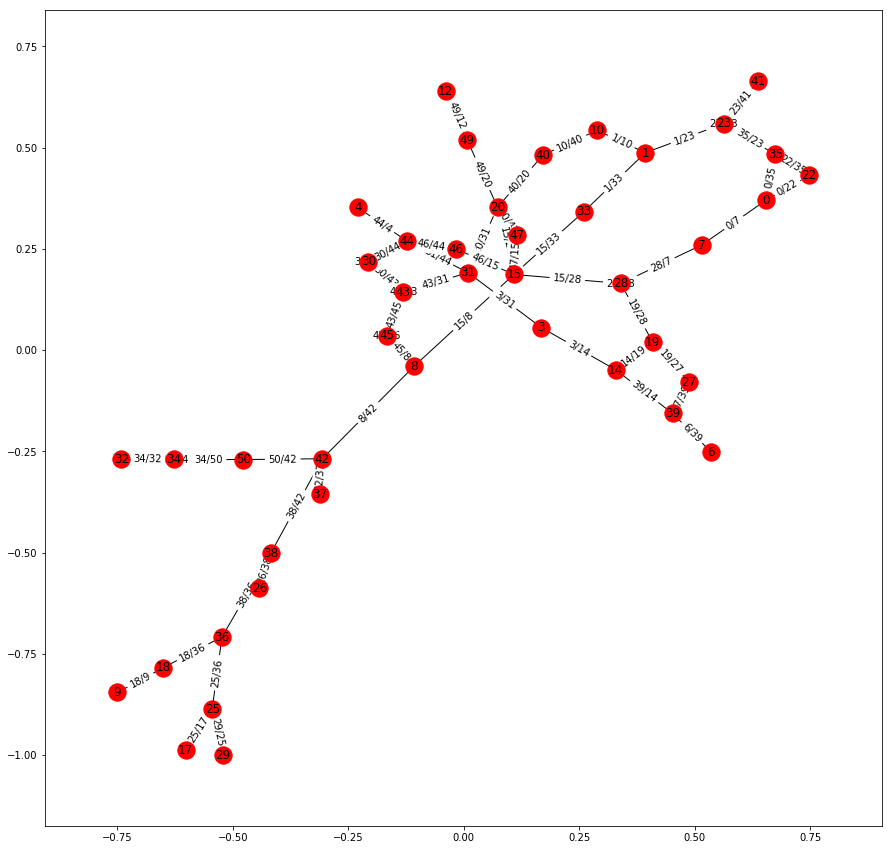

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
nx.draw_networkx(g, pos=pos, ax=ax)
_ = nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=labels, ax=ax)

In [7]:
def bridge_strength(bridge_node_list):
    strength = 0
    for i in range(1,len(bridge_node_list)):
        strength += bridge_node_list[i] + bridge_node_list[i - 1]
    return strength

# Part 1

In [8]:
stack = []
seen = set()

stack.append((-1, 0))
while stack:
    p = stack.pop()
    node = p[-1]
    children = list(g[node])
    for c in children:
        edges = [tuple(sorted([p[i], p[i - 1]])) for i in range(1, len(p))]
        newedge = tuple(sorted((p[-1], c)))
        if newedge not in edges:
            newp = p + (c,)
            if newp not in seen:
                seen.add(newp)
                stack.append(newp)   

paths = [i[1:] for i in seen]

path_strengths = list(map(bridge_strength, paths))
print(f'part 1 answer: {max(path_strengths)}')

part 1 answer: 1940


# Part 2

In [9]:
len_longest = max(map(len, paths))
longest = [path for path in paths if len(path) == len_longest]
longest_path_strengths = list(map(bridge_strength, longest))

print(f'part 2 answer: {max(longest_path_strengths)}')

part 2 answer: 1928


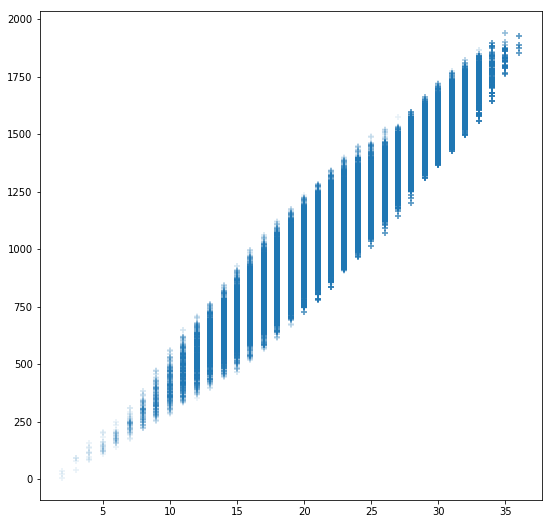

In [26]:
fig, ax = plt.subplots(figsize=(9,9))
plt.scatter(y=list(map(bridge_strength, paths)), x=list(map(len, paths)), marker='+', alpha=0.1)

In [13]:
list(map(len, paths))

[25,
 27,
 25,
 29,
 24,
 13,
 13,
 22,
 27,
 20,
 22,
 28,
 23,
 26,
 24,
 24,
 25,
 18,
 22,
 22,
 22,
 26,
 26,
 26,
 16,
 12,
 21,
 28,
 26,
 25,
 28,
 25,
 25,
 23,
 20,
 22,
 29,
 28,
 28,
 29,
 29,
 23,
 26,
 21,
 29,
 21,
 24,
 24,
 26,
 21,
 22,
 16,
 25,
 22,
 18,
 25,
 18,
 30,
 21,
 29,
 28,
 29,
 25,
 23,
 29,
 28,
 33,
 24,
 26,
 28,
 26,
 26,
 26,
 28,
 27,
 30,
 14,
 13,
 26,
 26,
 29,
 25,
 31,
 21,
 23,
 20,
 25,
 26,
 28,
 27,
 26,
 24,
 23,
 22,
 27,
 19,
 15,
 18,
 19,
 28,
 15,
 26,
 26,
 22,
 25,
 26,
 24,
 23,
 22,
 25,
 29,
 28,
 24,
 25,
 27,
 32,
 27,
 28,
 23,
 23,
 28,
 23,
 29,
 24,
 30,
 22,
 25,
 20,
 23,
 25,
 29,
 19,
 25,
 23,
 21,
 23,
 20,
 25,
 22,
 21,
 21,
 28,
 27,
 30,
 26,
 22,
 30,
 15,
 22,
 30,
 28,
 31,
 25,
 21,
 22,
 24,
 25,
 26,
 27,
 23,
 26,
 20,
 25,
 27,
 29,
 29,
 31,
 16,
 24,
 23,
 25,
 32,
 16,
 25,
 17,
 21,
 31,
 26,
 22,
 24,
 27,
 20,
 29,
 26,
 25,
 27,
 19,
 26,
 21,
 19,
 27,
 27,
 25,
 21,
 27,
 28,
 19,
 27,
 19,
 23,
